In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.dates as mdates
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(os.listdir('/content/drive/MyDrive/internship/Raspi_with_arduino/result_experiments/08-08-2025-bb'))

['fullcell.csv', 'v-capa.csv', 'fullcell-capa.csv']


In [ ]:
file_path = '/content/drive/MyDrive/internship/Raspi_with_arduino/result_experiments/08-08-2025-bb/fullcell.csv'
file_path_fullcellcapa = '/content/drive/MyDrive/internship/Raspi_with_arduino/result_experiments/08-08-2025-bb/fullcell-capa.csv'
file_path_vcapa = '/content/drive/MyDrive/internship/Raspi_with_arduino/result_experiments/08-08-2025-bb/v-capa.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Time,Value,Value_2ND,,DateTime : ( 25 / 08 / 07 -- 17 : 00 : 30 ) - DCV DCI
0,17:00:31:156,0.000056,-0.004566,NaN,NaN
1,17:00:31:423,0.000145,-0.004546,NaN,NaN
2,17:00:31:687,0.000111,-0.004548,NaN,NaN
3,17:00:31:952,-0.000316,-0.004540,NaN,NaN
4,17:00:32:221,0.000274,-0.004544,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62873 entries, 0 to 62872
Data columns (total 5 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Time                                                    62873 non-null  object 
 1   Value                                                   62873 non-null  float64
 2   Value_2ND                                               62873 non-null  float64
 3                                                           0 non-null      float64
 4   DateTime : ( 25 / 08 / 07 -- 17 : 00 : 30 )  - DCV DCI  0 non-null      float64
dtypes: float64(4), object(1)
memory usage: 2.4+ MB


In [ ]:
df['Value_2ND_Positive'] = df['Value_2ND '].abs()

In [ ]:
start_time = pd.to_datetime("17:32:41.046000", format="%H:%M:%S.%f")
end_time = pd.to_datetime("23:59:59.999000", format="%H:%M:%S.%f")

df['Time_fixed'] = df['Time'].apply(lambda x: x + '000' if len(x.split(':')[-1]) == 3 else x)
df['Time_dt'] = pd.to_datetime(df['Time_fixed'], format='%H:%M:%S:%f')

df_filtered = df[(df['Time_dt'] >= start_time) & (df['Time_dt'] <= end_time)].copy()

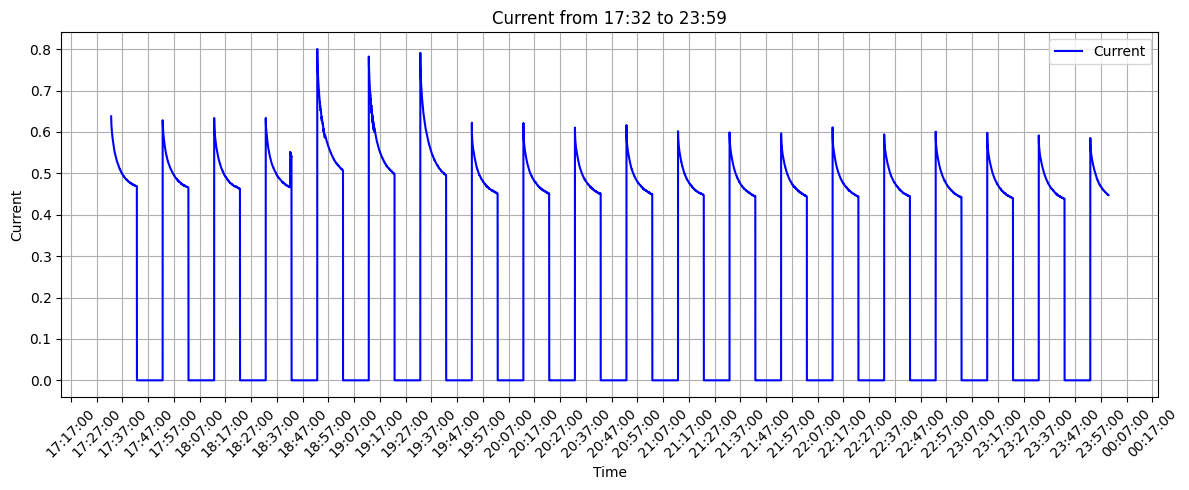

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))
plt.plot(df_filtered['Time_dt'], df_filtered['Value_2ND '].abs(), color='blue', label='Current')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))

plt.xlabel('Time')
plt.ylabel('Current')
plt.title('Current from 17:32 to 23:59')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
import numpy as np
from scipy.signal import find_peaks

current = df_filtered['Value_2ND '].abs().values
time_vals = df_filtered['Time_dt'].values

peaks, _ = find_peaks(current, height=0.4, distance=30)

threshold = 0.05
results = []

for peak_idx in peaks:
    for i in range(peak_idx + 1, len(current)):
        if current[i] < threshold:
            results.append({
                "Peak Time": time_vals[peak_idx],
                "Peak Value": current[peak_idx],
                "Drop Time": time_vals[i],
                "Drop Value": current[i]
            })
            break

In [ ]:
df_events = pd.DataFrame(results)
print(df_events.head())

                Peak Time  Peak Value               Drop Time  Drop Value
0 1900-01-01 17:35:03.541    0.526678 1900-01-01 17:42:41.135     0.00002
1 1900-01-01 17:36:02.673    0.510605 1900-01-01 17:42:41.135     0.00002
2 1900-01-01 17:36:48.845    0.500285 1900-01-01 17:42:41.135     0.00002
3 1900-01-01 17:37:39.997    0.492690 1900-01-01 17:42:41.135     0.00002
4 1900-01-01 17:38:10.136    0.488488 1900-01-01 17:42:41.135     0.00002


In [ ]:
df_events['Peak Time'] = pd.to_datetime(df_events['Peak Time'])
df_events['Drop Time'] = pd.to_datetime(df_events['Drop Time'])

df_events['Duration (s)'] = (df_events['Drop Time'] - df_events['Peak Time']).dt.total_seconds()

In [ ]:
average_minutes = df_events['Duration (s)'].mean() / 60
print(f"Average time: {average_minutes:.2f} minutes")

Average time: 4.45 minutes


In [ ]:
df1 = pd.read_csv(file_path_fullcellcapa)
df2 = pd.read_csv(file_path_vcapa)

In [ ]:
df1

,Time,Value,Value_2ND,,DateTime : ( 25 / 08 / 08 -- 11 : 33 : 47 ) - DCV DCI
0,11:33:47:995,-5.363818,0.036930,NaN,NaN
1,11:33:48:263,-5.363056,0.036923,NaN,NaN
2,11:33:48:528,-5.362327,0.036899,NaN,NaN
3,11:33:48:801,-5.361132,0.036903,NaN,NaN
4,11:33:49:068,-5.360516,0.036909,NaN,NaN
...,...,...,...,...,...
6460,12:04:12:119,-1.250131,0.000006,NaN,NaN
6461,12:04:12:391,-1.239967,0.000002,NaN,NaN
6462,12:04:12:659,-1.235714,0.000022,NaN,NaN
6463,12:04:12:933,-1.225725,0.000011,NaN,NaN


In [ ]:
df2

,Time,Value,Value_2ND,,DateTime : ( 25 / 08 / 08 -- 11 : 33 : 47 ) - DCV DCI
0,11:33:48:129,-2.190908,1.147554e-02,NaN,NaN
1,11:33:48:395,-2.191703,1.147741e-02,NaN,NaN
2,11:33:48:663,-2.193512,1.146461e-02,NaN,NaN
3,11:33:48:935,-2.194330,1.148192e-02,NaN,NaN
4,11:33:49:199,-2.196121,1.146893e-02,NaN,NaN
...,...,...,...,...,...
6460,12:04:12:251,-4.928171,-3.342221e-07,NaN,NaN
6461,12:04:12:523,-4.928089,7.367063e-06,NaN,NaN
6462,12:04:12:791,-4.927834,-5.672805e-06,NaN,NaN
6463,12:04:13:066,-4.927739,1.199569e-05,NaN,NaN


In [ ]:
def fix_time_column(df):
    df['Time_fixed'] = df['Time'].apply(lambda x: x + '000' if len(x.split(':')[-1]) == 3 else x)
    df['Time_str'] = pd.to_datetime(df['Time_fixed'], format='%H:%M:%S:%f').dt.strftime('%H:%M:%S')
    return df

df1 = fix_time_column(df1)
df2 = fix_time_column(df2)

In [ ]:
df1

,Time,Value,Value_2ND,,DateTime : ( 25 / 08 / 08 -- 11 : 33 : 47 ) - DCV DCI,Time_fixed,Time_str
0,11:33:47:995,-5.363818,0.036930,NaN,NaN,11:33:47:995000,11:33:47
1,11:33:48:263,-5.363056,0.036923,NaN,NaN,11:33:48:263000,11:33:48
2,11:33:48:528,-5.362327,0.036899,NaN,NaN,11:33:48:528000,11:33:48
3,11:33:48:801,-5.361132,0.036903,NaN,NaN,11:33:48:801000,11:33:48
4,11:33:49:068,-5.360516,0.036909,NaN,NaN,11:33:49:068000,11:33:49
...,...,...,...,...,...,...,...
6460,12:04:12:119,-1.250131,0.000006,NaN,NaN,12:04:12:119000,12:04:12
6461,12:04:12:391,-1.239967,0.000002,NaN,NaN,12:04:12:391000,12:04:12
6462,12:04:12:659,-1.235714,0.000022,NaN,NaN,12:04:12:659000,12:04:12
6463,12:04:12:933,-1.225725,0.000011,NaN,NaN,12:04:12:933000,12:04:12


In [ ]:
merged_df = pd.merge(df1, df2, on='Time_str', suffixes=('_fullcell', '_vcapa'))

merged_df = merged_df.sort_values(by='Time_str').reset_index(drop=True)

In [ ]:
merged_df

,Time_fullcell,Value _fullcell,Value_2ND _fullcell,_fullcell,DateTime : ( 25 / 08 / 08 -- 11 : 33 : 47 ) - DCV DCI_fullcell,Time_fixed_fullcell,Time_str,Time_vcapa,Value _vcapa,Value_2ND _vcapa,_vcapa,DateTime : ( 25 / 08 / 08 -- 11 : 33 : 47 ) - DCV DCI_vcapa,Time_fixed_vcapa
0,11:33:48:263,-5.363056,0.036923,NaN,NaN,11:33:48:263000,11:33:48,11:33:48:129,-2.190908,1.147554e-02,NaN,NaN,11:33:48:129000
1,11:33:48:801,-5.361132,0.036903,NaN,NaN,11:33:48:801000,11:33:48,11:33:48:935,-2.194330,1.148192e-02,NaN,NaN,11:33:48:935000
2,11:33:48:801,-5.361132,0.036903,NaN,NaN,11:33:48:801000,11:33:48,11:33:48:663,-2.193512,1.146461e-02,NaN,NaN,11:33:48:663000
3,11:33:48:801,-5.361132,0.036903,NaN,NaN,11:33:48:801000,11:33:48,11:33:48:395,-2.191703,1.147741e-02,NaN,NaN,11:33:48:395000
4,11:33:48:528,-5.362327,0.036899,NaN,NaN,11:33:48:528000,11:33:48,11:33:48:935,-2.194330,1.148192e-02,NaN,NaN,11:33:48:935000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22760,12:04:12:119,-1.250131,0.000006,NaN,NaN,12:04:12:119000,12:04:12,12:04:12:523,-4.928089,7.367063e-06,NaN,NaN,12:04:12:523000
22761,12:04:12:119,-1.250131,0.000006,NaN,NaN,12:04:12:119000,12:04:12,12:04:12:251,-4.928171,-3.342221e-07,NaN,NaN,12:04:12:251000
22762,12:04:12:391,-1.239967,0.000002,NaN,NaN,12:04:12:391000,12:04:12,12:04:12:791,-4.927834,-5.672805e-06,NaN,NaN,12:04:12:791000
22763,12:04:13:199,-1.221480,0.000016,NaN,NaN,12:04:13:199000,12:04:13,12:04:13:066,-4.927739,1.199569e-05,NaN,NaN,12:04:13:066000


In [ ]:
merged_df.to_csv('/content/drive/MyDrive/internship/Raspi_with_arduino/result_experiments/08-08-2025-bb/merged_time.csv', index=False)